In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [242]:
df = pd.read_csv('./bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [243]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [244]:
df.drop(['availability', 'area_type', 'society',
        'balcony'], axis='columns', inplace=True)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [245]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [246]:
df.dropna(inplace=True)
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [247]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [248]:
df['bhk'] = df['size'].apply(lambda x:  int(x.split(' ')[0]))

In [249]:
if any(df.columns == 'size'):
    df.drop(columns=['size'], inplace=True)

In [250]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [251]:
df[~df['total_sqft'].apply(is_float)].head()

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2


In [252]:
def correct_sqft(x):
    if ((is_float(x) == False) and (x is not None)):
        tokens = x.split('-')
        if len(tokens) == 2:
            return (float(tokens[0]) + float(tokens[1]))/2
        try:
            return float(x)
        except:
            return None
    return x

In [253]:
df[df['total_sqft'] == '300Sq. Yards']

,location,total_sqft,bath,price,bhk
12652,Billamaranahalli,300Sq. Yards,2.0,150.0,2


In [254]:
correct_sqft('300Sq. Yards')

In [255]:
df['total_sqft'] = df['total_sqft'].apply(correct_sqft)
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [256]:
df = df[df.total_sqft.isnull() == False]

In [257]:
df['total_sqft'] = df['total_sqft'].apply(lambda x: float(x))

In [258]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [259]:
len(df['location'].unique())

1298

Nice one ⬇️


In [260]:
df['location'] = df['location'].apply(lambda x: x.strip())
location_stats = df.groupby('location').location.agg(
    'count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [261]:
location_stats_less_than_11 = location_stats[location_stats <= 10]
len(location_stats[location_stats <= 10])

1047

In [262]:
df['location'] = df['location'].apply(
    lambda x: "other" if x in location_stats_less_than_11 else x)

In [263]:
len(df['location'].unique())

241

In [264]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [265]:
df = df[~(df['total_sqft'] / df['bhk'] < 300)]

<Axes: xlabel='price_per_sqft', ylabel='Density'>

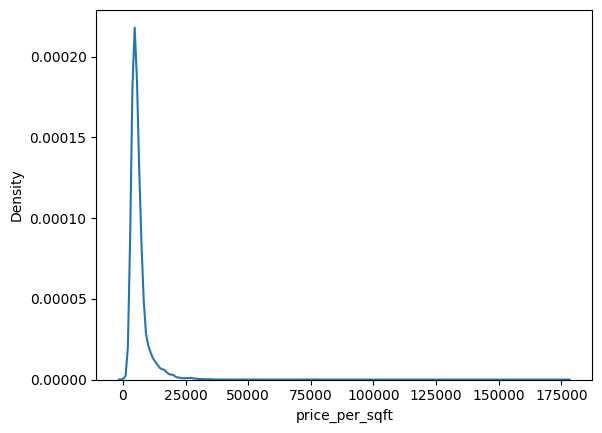

In [266]:
sns.kdeplot(df['price_per_sqft'])

In [267]:
# def IQR_filtering(x):
#     Q1 = np.percentile(x, 25)
#     Q3 = np.percentile(x, 75)
#     IQR = Q3 - Q1

#     lower_threshold = Q1 - 1.5*IQR
#     upper_threshold = Q3 + 1.5*IQR

#     return (x < upper_threshold) & (x > lower_threshold)

def IQR_filtering(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [268]:
updated_pps_indices = IQR_filtering(df)
# updated_pps_indices = IQR_filtering(df['price_per_sqft'])

In [269]:
df['price_per_sqft'].shape

(12456,)

In [270]:
# df_filtered = df[updated_pps_indices]
# df_filtered.shape

In [271]:
# df = df[updated_pps_indices]
df = updated_pps_indices
df.shape

(10242, 6)

<Axes: xlabel='price_per_sqft', ylabel='Density'>

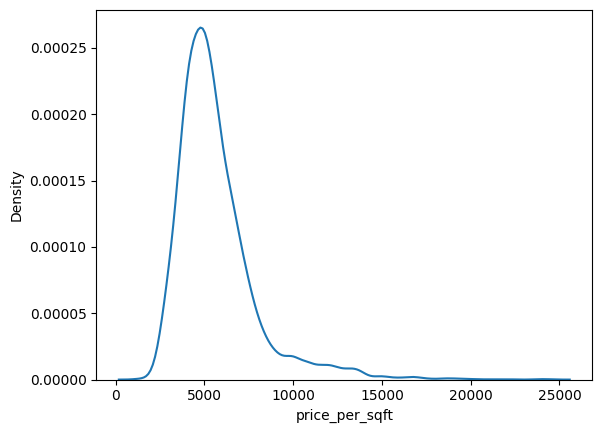

In [272]:
sns.kdeplot(df['price_per_sqft'])

In [273]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


In [274]:
def plot_bhk_diff(df, location):
    plt.scatter(df[(df['location'] == location) & (df['bhk'] == 2)].total_sqft,
                df[(df['location'] == location) & (df['bhk'] == 2)].price)
    plt.scatter(df[(df['location'] == location) & (df['bhk'] == 3)].total_sqft,
                df[(df['location'] == location) & (df['bhk'] == 3)].price)
    plt.xlabel("sqft")
    plt.ylabel("price")
    plt.legend(['bhk 2 ', 'bhk 3'])

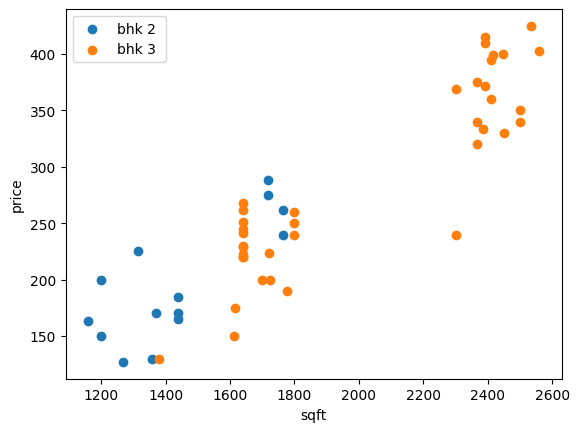

In [275]:
plot_bhk_diff(df, "Rajaji Nagar")

In [276]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(
                    exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')


df = remove_bhk_outliers(df)
df.shape

(7317, 6)

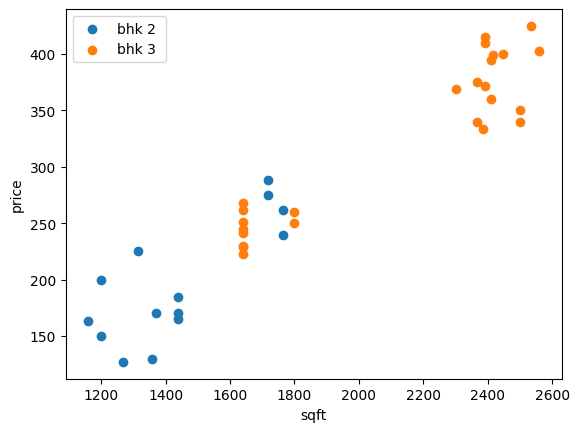

In [277]:
plot_bhk_diff(df, "Rajaji Nagar")

In [278]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


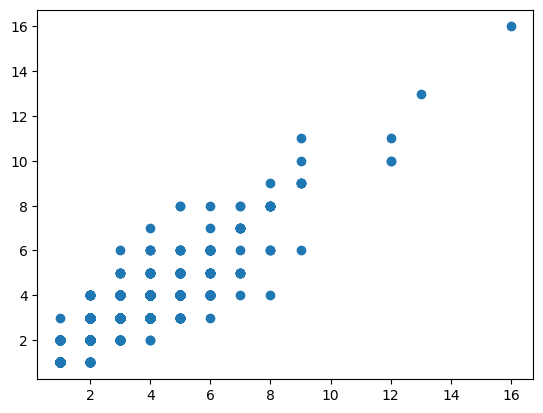

In [279]:
plt.scatter(df.bath, df.bhk)

In [280]:
df[df.bath > df.bhk + 2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8408,other,11338.0,9.0,1000.0,6,8819.897689


In [281]:
df = df[df.bath <= df.bhk + 2]
df.shape

(7313, 6)

In [282]:
df.drop(columns=['price_per_sqft'], inplace=True)

In [283]:
df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [284]:
len(df['location'].unique())

241

In [285]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [286]:
len(df.location.unique())

241

In [287]:
ct = ColumnTransformer(
    transformers=[("ohe", OneHotEncoder(sparse_output=False, drop='first'), [0])], remainder='passthrough'
)

df_new = ct.fit_transform(df)
df_new = pd.DataFrame(df_new)
df_new

,0,1,2,3,4,5,6,7,8,9,...,234,235,236,237,238,239,240,241,242,243
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2850.0,4.0,428.0,4.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1630.0,3.0,194.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1875.0,2.0,235.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1200.0,2.0,130.0,3.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1235.0,2.0,148.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1200.0,2.0,70.0,2.0
7309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1800.0,1.0,200.0,1.0
7310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1353.0,2.0,110.0,2.0
7311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,812.0,1.0,26.0,1.0


In [288]:
X = df_new.drop([242], axis='columns')
Y = df_new[242]

In [289]:
X

,0,1,2,3,4,5,6,7,8,9,...,233,234,235,236,237,238,239,240,241,243
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2850.0,4.0,4.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1630.0,3.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1875.0,2.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1200.0,2.0,3.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1235.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1200.0,2.0,2.0
7309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1800.0,1.0,1.0
7310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1353.0,2.0,2.0
7311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,812.0,1.0,1.0


In [290]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [292]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model.predict(X_test)
lr_model.score(X_test, y_test)
# cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

0.8813244911999157

In [293]:
gs =  GridSearchCV(estimator=LinearRegression(), param_grid={}, cv=10)
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearRegression(), param_grid={})

In [294]:
y_pred = gs.predict(X_test)

In [295]:
y_test = np.array(y_test)
y_test

array([99.39, 68.  , 43.  , ..., 46.  , 35.  , 65.  ])

In [296]:
y_pred

array([102.48001996, 101.06800715,  49.63442198, ...,  43.78630911,
        48.78097514,  80.99095982])

In [297]:
from sklearn.metrics import confusion_matrix

In [298]:
gs.best_score_

0.8320863775956505

In [299]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

cross_val_score(LinearRegression(), X_train, y_train, cv=10)

array([0.8408972 , 0.80121441, 0.87923729, 0.83267109, 0.90016843,
       0.75124606, 0.84871887, 0.85900148, 0.83606611, 0.77164284])

In [300]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.86801733, 0.84558034, 0.83182627, 0.83917255, 0.86424179])

In [301]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

c:\Users\mohammad asfraf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mohammad asfraf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mohammad asfraf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\mohammad asfraf\AppData\Local\Programs\Python\Pyt

,model,best_score,best_params
0,linear_regression,0.849768,{}
1,lasso,0.711598,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.782240,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [302]:
X

,0,1,2,3,4,5,6,7,8,9,...,233,234,235,236,237,238,239,240,241,243
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2850.0,4.0,4.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1630.0,3.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1875.0,2.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1200.0,2.0,3.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1235.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1200.0,2.0,2.0
7309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1800.0,1.0,1.0
7310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1353.0,2.0,2.0
7311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,812.0,1.0,1.0


In [303]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_model.predict([x])[0]

In [304]:
from sklearn.pipeline import Pipeline

In [305]:
df

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10233,other,1200.0,2.0,70.0,2
10234,other,1800.0,1.0,200.0,1
10237,other,1353.0,2.0,110.0,2
10238,other,812.0,1.0,26.0,1


In [306]:
trf1 = ColumnTransformer(
    transformers=[("ohe", OneHotEncoder(sparse_output=False, drop='first'), [0])], remainder='passthrough'
)

In [307]:
df_train = df.drop(columns=['price'])
df_test = df['price']

In [308]:
trf2 = LinearRegression()

In [309]:
pipe = Pipeline([('trf1', trf1), ('trf2', trf2)])

In [310]:
pipe.fit(df_train, df_test)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0])])),
                ('trf2', LinearRegression())])

In [311]:
import pickle

In [312]:
pickle.dump(pipe, open('BHP.pkl', 'wb'))

In [313]:
import json

In [314]:
locs = df['location'].unique().tolist()

In [315]:
df_train.columns.tolist()

['location', 'total_sqft', 'bath', 'bhk']

In [316]:
Columns = {
    'data_locations': locs,
    'columns': df_train.columns.tolist()
}

with open("BHP_Columns.json", "w") as f:
    f.write(json.dumps(Columns))

In [317]:
with open("./BHP.pkl", "rb") as file:
    model = pickle.load(file)

In [318]:
model.predict([['Hennur Road', 1200, 2, 2]])

c:\Users\mohammad asfraf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([67.81123648])

In [319]:
model.score(df_train, df_test)

0.854440119655511